In [1]:
import numpy as np
import seaborn as sns
import numpy.random as rd
import matplotlib.pyplot as plt
import math
from IPython.display import display, Math
import scipy.stats as st

### Задание:
Постройте два доверительных интервала для среднего (не для нормальной модели): один с известной дисперсией, другой с оцененной по выборке

Рассмотрим случайную величину с логистическим распределением с $\mu=0$ и $\sigma^2=\frac{\pi^2}{3}$.
Для удобства покажем, что выборочное среднее $\bar x$ действительно асимптотически нормально:

In [2]:
std = (np.pi/np.sqrt(3))

In [3]:
def dist_foo(lst):
    """
    выборочная функция распределения
    """
    n = len(lst)
    y = [i/n for i in range(n)]
    return np.array(y)

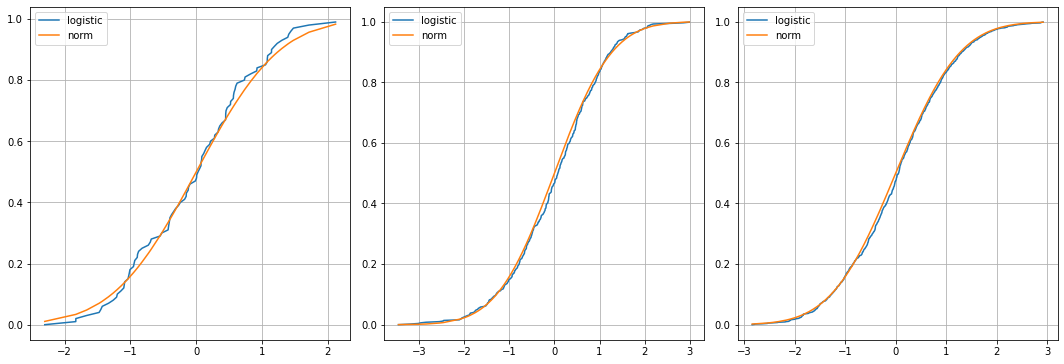

In [4]:
m = 100    # размер выборки x_1, ..., x_m

plt.figure(figsize=(15, 15))
cmap = plt.get_cmap("tab10").colors

for k, n in enumerate([100, 500, 1000]):
    plt.subplot(3, 3, k+1)
    plt.tight_layout()
    
    points = []
    for i in range(n):    
        x = st.logistic.rvs(size=m)
        points.append(np.sqrt(m) * x.mean() / std)

    points.sort()
    plt.plot(points, dist_foo(points), label='logistic')
    plt.plot(points, st.norm.cdf(points), label='norm')
    plt.legend()
    plt.grid(True)
plt.show()

Теперь построим доверительные интервалы для разных n и подсчитаем вероятность того, что среднее попадает в интервал
Т.е. мы для каждого n будем один раз смотреть, попало среднее или нет, но мы переберем много разных n.

In [5]:
p = 0.95    # доверит

In [6]:
def entries_count(average, interv):
    """
    функция для посчета количества вхождений
    """
    counter = 0
    for i in range(right - left):
        if np.abs(average[i]) <= interv[i]:
            counter += 1
    return counter/(right - left)

In [7]:
average, interv_1, interv_2  = [], [], []    # для каждого n будем сохранять соответ
left, right = 5, 1000

# interv_1 -- полуширина интервала при известной дисперсии
# interv_2 -- полуширина интервала при неизвестной дисперсии

for n in range(left, right):
    z = st.logistic.rvs(size=n)
    average.append(np.mean(z))
    interv_1.append(st.norm.ppf(0.975) * std / np.sqrt(n))
    interv_2.append(st.t.ppf(0.975, n - 1) * np.sqrt(x.var()) / np.sqrt(n - 1))
    

Теперь посмотрим вероятность попадения в доверительный интервал в случаях известной и неизвестной дисперсии

In [8]:
print(f'p = {entries_count(average, interv_1):.6f}  <--   known variance')
print(f'p = {entries_count(average, interv_2):.6f}  <-- unknown variance')


p = 0.955779  <--   known variance
p = 0.958794  <-- unknown variance


Теперь поглядим как меняется у нас (полу-)ширина доверительного интервала

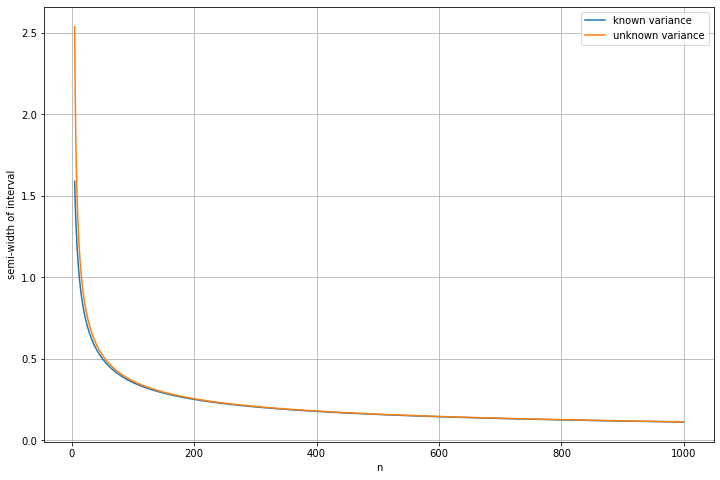

In [9]:
plt.figure(figsize = (12, 8))

plt.plot(range(left, right), np.array(interv_1), label = 'known variance')
plt.plot(range(left, right), np.array(interv_2), label = 'unknown variance')
plt.grid(True)
plt.legend()
plt.ylabel('semi-width of interval')
plt.xlabel('n')
plt.show()